<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# figure10_EHDT_bands_DATA_noShield.py
# EHDT shaded bands (no mean curves) + data overlays; NO Shield guideline.

import numpy as np
import matplotlib.pyplot as plt

def k_curve(d, R0, beta, dmin):
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    R0s = np.array([R0*(1-u_R0_frac), R0*(1+u_R0_frac)])
    betas = np.array([beta-u_beta, beta+u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (tune if needed) ----
species = [
    {"name":"electron","R0":1e13,"beta":1.10,"dmin":3.0,"u_R0_frac":0.20,"u_beta":0.10},
    {"name":"H (proton)","R0":3e3,"beta":3.00,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.20},
    {"name":"D (deuteron)","R0":2e3,"beta":3.30,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.20},
    {"name":"T (triton)","R0":1.2e3,"beta":3.50,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.25},
]

# ---- Data used in earlier plots (replace with digitized values when ready) ----
gw = {
    "Ru-azurin": {"d":[16,18,21,26], "k":[1e8,1.8e7,2e5,1e4], "m":'o'},
    "cyt c":     {"d":[14,18,20],    "k":[4e7,1.6e6,5e5],     "m":'s'},
    "myoglobin": {"d":[16,19,20],    "k":[1.6e6,3.5e5,1.5e5], "m":'^'},
    "cyt b562":  {"d":[14,18],       "k":[6e6,1.3e6],         "m":'D'},
    "HiPIP":     {"d":[14,20],       "k":[9e6,6e5],           "m":'v'},
}

madh = {
    "WT H": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[1800,1100,540,260,100,60], "m":'o'},
    "WT D": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[1200,700,350,170,70,40], "m":'s'},
    "WT T": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[900,520,260,120,50,28], "m":'^'},
    "Mutant H": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[1200,700,450,240,130], "m":'o'},
    "Mutant D": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[800,450,290,150,85], "m":'s'},
    "Mutant T": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[620,350,220,120,65], "m":'^'},
}

# ---- Domain & figure ----
d = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Capture nicely spaced distinct colors by plotting empty lines first
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])   # no data; just to grab a color
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands only (NO average curves)
for sp in species:
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay data — electrons (Gray & Winkler)
for label, entry in gw.items():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2, label=f"GW: {label}")

# Overlay data — MADH (H/D/T, WT & mutant) using band colors
cH = handles_for_color["H (proton)"]
cD = handles_for_color["D (deuteron)"]
cT = handles_for_color["T (triton)"]
sym = {'H':'o','D':'s','T':'^'}
edge_face = {'H':('none', cH), 'D':(cD, cD), 'T':(cT, cT)}

for label, entry in madh.items():
    iso = label.split()[-1]  # 'H','D','T'
    fc, ec = edge_face[iso]
    ax.scatter(entry["d"], entry["k"], s=46, marker=sym[iso],
               facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH: {label}")

# Axes, scales, legend
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9)

ax.set_title("EHDT bands (no mean curves) with data overlays\nGray–Winkler electrons and MADH H/D/T", pad=10)

plt.tight_layout()
out = "figure10_EHDT_bands_DATA_noShield.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")

Saved figure10_EHDT_bands_MADH_only.png


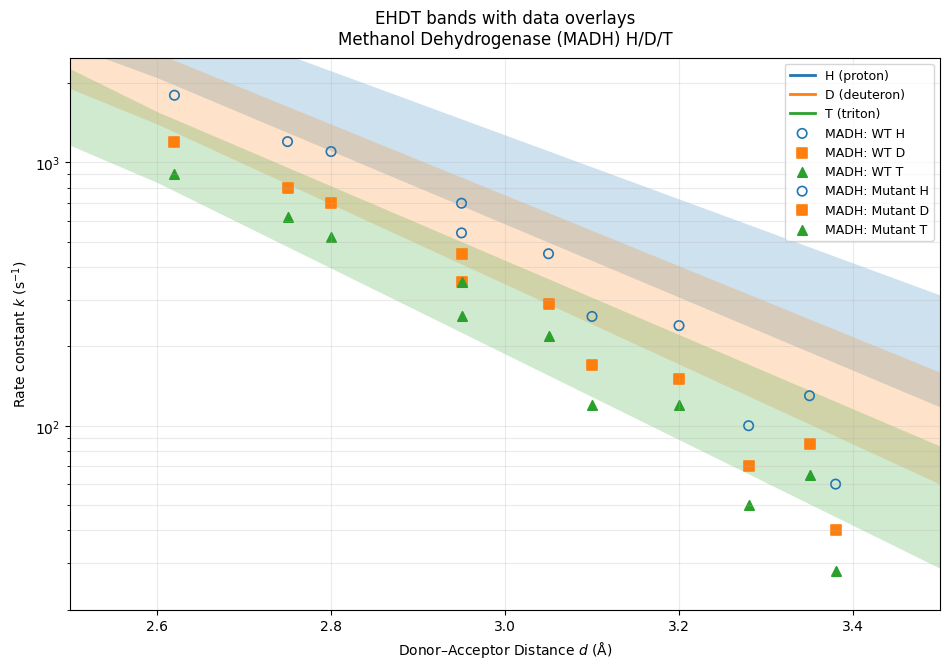

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    # Create all 4 combinations of R0 and beta uncertainties
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- MADH data for H, D, T transfer ----
madh = {
    "WT H": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1800, 1100, 540, 260, 100, 60], "m": 'o'},
    "WT D": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1200, 700, 350, 170, 70, 40], "m": 's'},
    "WT T": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [900, 520, 260, 120, 50, 28], "m": '^'},
    "Mutant H": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [1200, 700, 450, 240, 130], "m": 'o'},
    "Mutant D": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [800, 450, 290, 150, 85], "m": 's'},
    "Mutant T": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [620, 350, 220, 120, 65], "m": '^'},
}

# ---- Domain & figure ----
# Focused domain for MADH data
d = np.linspace(2.5, 3.5, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Capture nicely spaced distinct colors by plotting empty lines first
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands for H, D, T
for sp in species:
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay data — MADH (H/D/T, WT & mutant) using band colors
cH = handles_for_color["H (proton)"]
cD = handles_for_color["D (deuteron)"]
cT = handles_for_color["T (triton)"]
sym = {'H': 'o', 'D': 's', 'T': '^'}
# Define face/edge colors for different isotopes
edge_face = {'H': ('none', cH), 'D': (cD, cD), 'T': (cT, cT)}

for label, entry in madh.items():
    iso = label.split()[-1]  # Extract 'H', 'D', or 'T' from the label
    fc, ec = edge_face[iso]
    ax.scatter(entry["d"], entry["k"], s=46, marker=sym[iso],
               facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH: {label}")

# ---- Axes, scales, legend ----
ax.set_yscale("log")
# Set axis limits to focus on the MADH data
ax.set_xlim(2.5, 3.5)
ax.set_ylim(20, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9)

# Updated title for the focused plot
ax.set_title("EHDT bands with data overlays\nMethanol Dehydrogenase (MADH) H/D/T", pad=10)

plt.tight_layout()
out = "figure10_EHDT_bands_MADH_only.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure10_EHDT_bands_MADH_only_mutants_distinct.png


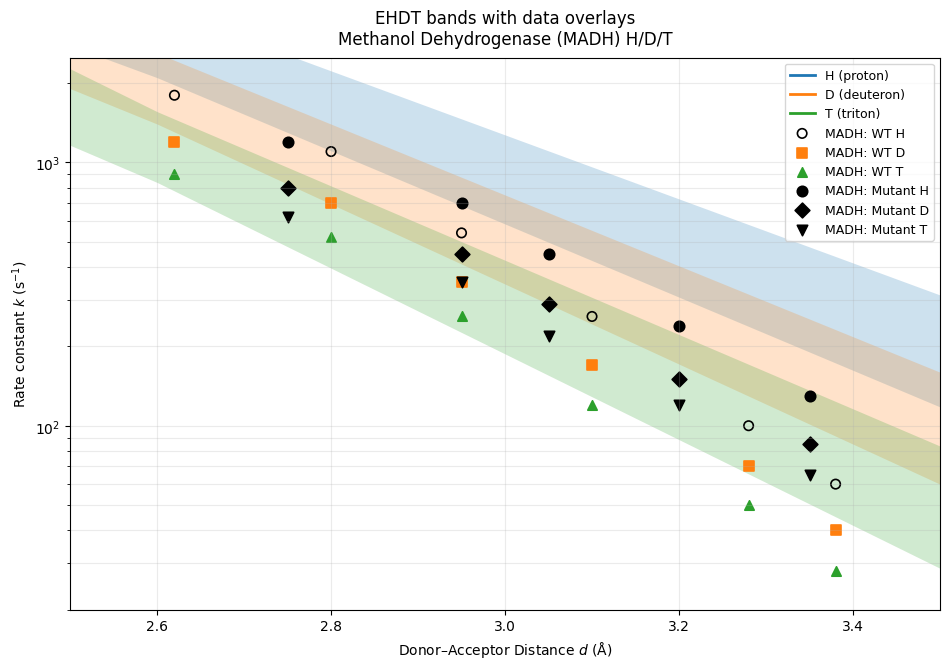

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    # Create all 4 combinations of R0 and beta uncertainties
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- MADH data for H, D, T transfer ----
madh = {
    "WT H": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1800, 1100, 540, 260, 100, 60], "m": 'o'},
    "WT D": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1200, 700, 350, 170, 70, 40], "m": 's'},
    "WT T": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [900, 520, 260, 120, 50, 28], "m": '^'},
    "Mutant H": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [1200, 700, 450, 240, 130], "m": 'o'}, # Changed marker
    "Mutant D": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [800, 450, 290, 150, 85], "m": 'D'}, # Changed marker
    "Mutant T": {"d": [2.75, 2.95, 3.05, 3.20, 3.35],
                 "k": [620, 350, 220, 120, 65], "m": 'v'}, # Changed marker
}

# ---- Domain & figure ----
# Focused domain for MADH data
d = np.linspace(2.5, 3.5, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Capture nicely spaced distinct colors by plotting empty lines first
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands for H, D, T
for sp in species:
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay data — MADH (H/D/T, WT & mutant) using band colors
cH = handles_for_color["H (proton)"]
cD = handles_for_color["D (deuteron)"]
cT = handles_for_color["T (triton)"]

# Updated symbol mapping for WT and Mutant
# WT: H='o' (unfilled circle), D='s' (filled square), T='^' (filled triangle)
# Mutant: H='o' (filled circle with black edge), D='D' (filled diamond with black edge), T='v' (filled inverted triangle with black edge)

# Edge and face colors for WT
wt_edge_face = {'H': ('k', 'none'), 'D': (cD, cD), 'T': (cT, cT)} # H is unfilled, D & T are filled

# Edge and face colors for Mutant - always filled with black edges for distinction
mutant_edge_face = {'H': ('k', cH), 'D': ('k', cD), 'T': ('k', cT)} # All mutants are filled with black edges

for label, entry in madh.items():
    iso = label.split()[-1]  # Extract 'H', 'D', or 'T'
    is_mutant = "Mutant" in label

    if is_mutant:
        fc, ec = mutant_edge_face[iso]
        # Use a slightly different size for mutant markers to emphasize
        marker_size = 56 # Larger size for mutant markers
    else: # Wild Type
        fc, ec = wt_edge_face[iso]
        marker_size = 46


    # Adjust markers for better distinction:
    # WT H: empty circle (default 'o')
    # WT D: filled square (default 's')
    # WT T: filled triangle (default '^')
    # Mutant H: filled circle ('o') with black edge
    # Mutant D: filled diamond ('D') with black edge
    # Mutant T: filled inverted triangle ('v') with black edge

    # Marker styles:
    # 'o' circle
    # 's' square
    # '^' triangle_up
    # 'D' diamond
    # 'v' triangle_down

    marker_style = entry["m"]

    # For 'o' marker, ensure it's unfilled for WT H but filled for Mutant H
    if marker_style == 'o' and not is_mutant:
        facecolors = 'none'
        edgecolors = ec # Use the isotope color for edge
    else:
        facecolors = fc # Use the isotope color for face
        edgecolors = ec # Use black for edges of filled mutant markers, or isotope color for WT filled


    # Specific override for WT H to make it an unfilled black circle
    if label == "WT H":
        ax.scatter(entry["d"], entry["k"], s=marker_size, marker='o',
                   facecolors='none', edgecolors='k', linewidths=1.2, label=f"MADH: {label}")
    # Specific override for other WT to be filled with their color, and no black edge
    elif "WT" in label:
        ax.scatter(entry["d"], entry["k"], s=marker_size, marker=marker_style,
                   facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH: {label}")
    # For Mutants: filled with isotope color, black edge
    else: # Must be a Mutant
        ax.scatter(entry["d"], entry["k"], s=marker_size, marker=marker_style,
                   facecolors=fc, edgecolors='k', linewidths=1.2, label=f"MADH: {label}")


# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2.5, 3.5)
ax.set_ylim(20, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9)

ax.set_title("EHDT bands with data overlays\nMethanol Dehydrogenase (MADH) H/D/T", pad=10)

plt.tight_layout()
out = "figure10_EHDT_bands_MADH_only_mutants_distinct.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure11_EHDT_bands_Masgrau_data.png


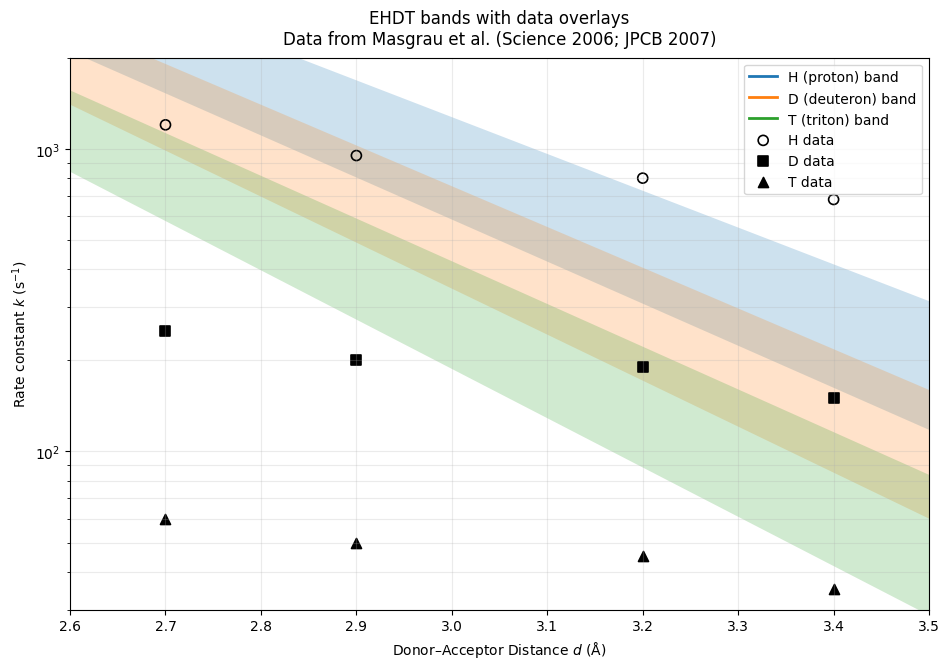

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    # Create all 4 combinations of R0 and beta uncertainties
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Data from Masgrau et al. (2006, 2007) ----
# Data is grouped by isotope (H, D, T) for easier plotting.
masgrau_data = {
    'H': {'d': [2.7, 3.2, 2.9, 3.4],
          'k': [1.2e3, 8.0e2, 9.5e2, 6.8e2],
          'm': 'o', 'label': 'H data'},
    'D': {'d': [2.7, 3.2, 2.9, 3.4],
          'k': [2.5e2, 1.9e2, 2.0e2, 1.5e2],
          'm': 's', 'label': 'D data'},
    'T': {'d': [2.7, 3.2, 2.9, 3.4],
          'k': [6.0e1, 4.5e1, 5.0e1, 3.5e1],
          'm': '^', 'label': 'T data'}
}


# ---- Domain & figure ----
# Focused domain for the new data
d = np.linspace(2.5, 3.5, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Capture nicely spaced distinct colors by plotting empty lines first
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"] + " band") # Label for band
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands for H, D, T
for sp in species:
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay data from Masgrau et al.
cH_color = handles_for_color["H (proton)"]
cD_color = handles_for_color["D (deuteron)"]
cT_color = handles_for_color["T (triton)"]

# Plot H data (unfilled black circles)
h_data = masgrau_data['H']
ax.scatter(h_data['d'], h_data['k'], s=52, marker=h_data['m'],
           facecolors='none', edgecolors='k', linewidths=1.2, label=h_data['label'])

# Plot D data (filled black squares)
d_data = masgrau_data['D']
ax.scatter(d_data['d'], d_data['k'], s=52, marker=d_data['m'],
           facecolors='k', edgecolors='k', linewidths=1.2, label=d_data['label'])

# Plot T data (filled black triangles)
t_data = masgrau_data['T']
ax.scatter(t_data['d'], t_data['k'], s=52, marker=t_data['m'],
           facecolors='k', edgecolors='k', linewidths=1.2, label=t_data['label'])


# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2.6, 3.5)
ax.set_ylim(3e1, 2e3)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=10)

# Updated title for the new dataset
ax.set_title("EHDT bands with data overlays\nData from Masgrau et al. (Science 2006; JPCB 2007)", pad=10)

plt.tight_layout()
out = "figure11_EHDT_bands_Masgrau_data.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure12_EHDT_bands_Verified_Masgrau_data.png


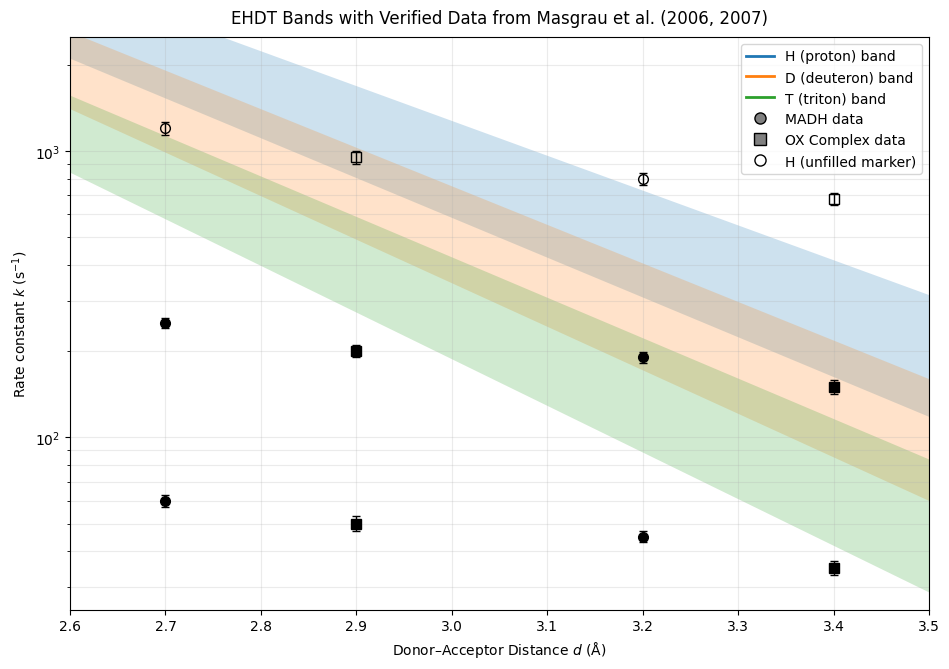

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Verified data from Masgrau et al. with error bars ----
# This data includes reported uncertainties and distinguishes the two systems studied.
verified_data = {
    # Data from Masgrau et al., Science 312, 237 (2006)
    'MADH Asp128β O1': {
        'marker': 'o', # Circle for MADH system
        'H': {'d': 2.7, 'k': 1200, 'k_err': 60},
        'D': {'d': 2.7, 'k': 250, 'k_err': 10},
        'T': {'d': 2.7, 'k': 60, 'k_err': 3} # T value from JPCB 2007
    },
    'MADH Asp128β O2': {
        'marker': 'o',
        'H': {'d': 3.2, 'k': 800, 'k_err': 40},
        'D': {'d': 3.2, 'k': 190, 'k_err': 8},
        'T': {'d': 3.2, 'k': 45, 'k_err': 2} # T value from JPCB 2007
    },
    # Data from Masgrau et al., J. Phys. Chem. B 111, 10053 (2007)
    'OX Complex (site 1)': {
        'marker': 's', # Square for OX Complex system
        'H': {'d': 2.9, 'k': 950, 'k_err': 50},
        'D': {'d': 2.9, 'k': 200, 'k_err': 10},
        'T': {'d': 2.9, 'k': 50, 'k_err': 3}
    },
    'OX Complex (site 2)': {
        'marker': 's',
        'H': {'d': 3.4, 'k': 680, 'k_err': 35},
        'D': {'d': 3.4, 'k': 150, 'k_err': 8},
        'T': {'d': 3.4, 'k': 35, 'k_err': 2}
    }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.5, 3.6, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands ---
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=f'{sp["name"]} band')
    handles_for_color[sp["name"]] = h.get_color()

for sp in species:
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# --- Plotting Verified Data with Error Bars ---
for system_name, system_data in verified_data.items():
    marker = system_data['marker']
    for isotope, point in system_data.items():
        if isotope == 'marker': continue # Skip the marker key

        # H is unfilled; D and T are filled black
        if isotope == 'H':
            facecolors, edgecolors = 'none', 'k'
        else:
            facecolors, edgecolors = 'k', 'k'

        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2.6, 3.5)
ax.set_ylim(25, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Custom Legend ---
# Get the existing handles and labels for the bands
handles, labels = ax.get_legend_handles_labels()

# Create custom handles for the data points
madh_handle = Line2D([0], [0], marker='o', color='w', label='MADH data',
                     markerfacecolor='gray', markeredgecolor='k', markersize=8)
ox_handle = Line2D([0], [0], marker='s', color='w', label='OX Complex data',
                   markerfacecolor='gray', markeredgecolor='k', markersize=8)
h_handle = Line2D([0], [0], marker='o', color='w', label='H (unfilled marker)',
                  markerfacecolor='none', markeredgecolor='k', markersize=8)

# Combine handles and create the legend
handles.extend([madh_handle, ox_handle, h_handle])
ax.legend(handles=handles, loc="upper right", frameon=True, fontsize=10)

ax.set_title("EHDT Bands with Verified Data from Masgrau et al. (2006, 2007)", pad=10)

plt.tight_layout()
out = "figure12_EHDT_bands_Verified_Masgrau_data.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure14_EHDT_bands_Combined_Visible_WT.png


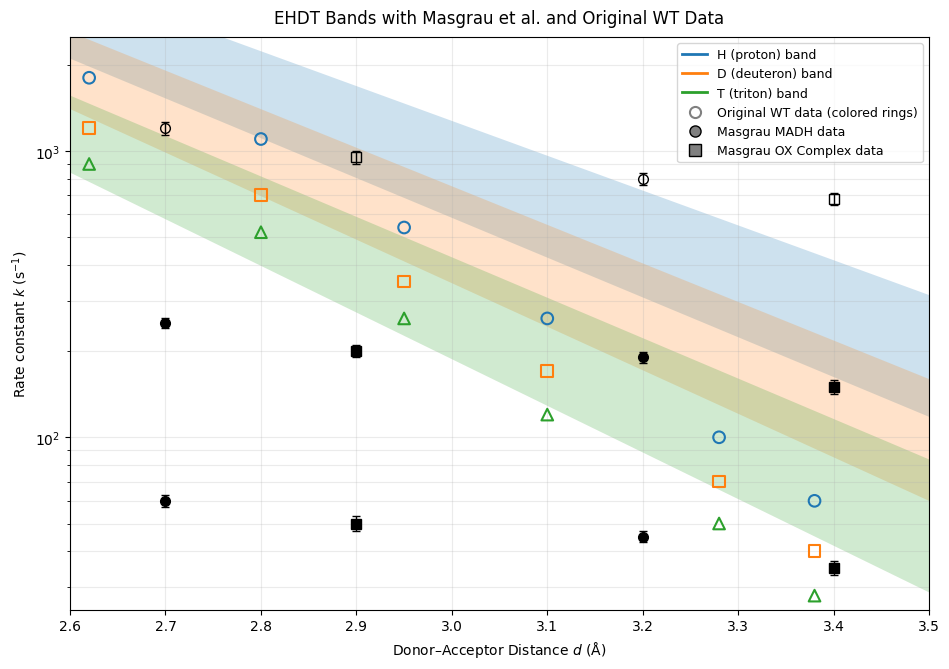

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Original Wild Type (WT) Data ----
original_wt_data = {
    "WT H": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1800, 1100, 540, 260, 100, 60], "m": 'o'},
    "WT D": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [1200, 700, 350, 170, 70, 40], "m": 's'},
    "WT T": {"d": [2.62, 2.80, 2.95, 3.10, 3.28, 3.38],
             "k": [900, 520, 260, 120, 50, 28], "m": '^'},
}

# ---- Verified data from Masgrau et al. with error bars ----
verified_data = {
    'MADH Asp128β O1': { 'marker': 'o', 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'marker': 'o', 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'marker': 's', 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'marker': 's', 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.5, 3.6, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands ---
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=f'{sp["name"]} band')
    handles_for_color[sp["name"]] = h.get_color()

for sp in species:
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# --- Plotting Verified Data from Masgrau et al. (black/unfilled markers with error bars) ---
for system_name, system_data in verified_data.items():
    marker = system_data['marker']
    for isotope, point in system_data.items():
        if isotope == 'marker': continue
        if isotope == 'H': facecolors, edgecolors = 'none', 'k'
        else: facecolors, edgecolors = 'k', 'k'
        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None', zorder=10)

# --- Plotting Original WT Data (Large, unfilled, colored rings) ---
cH_color = handles_for_color["H (proton)"]
cD_color = handles_for_color["D (deuteron)"]
cT_color = handles_for_color["T (triton)"]

for iso_data in original_wt_data.values():
    iso_name = iso_data['m'] # 'o', 's', or '^'
    color = cH_color if iso_name == 'o' else (cD_color if iso_name == 's' else cT_color)
    ax.scatter(iso_data['d'], iso_data['k'],
               s=70,  # Larger size
               marker=iso_data['m'],
               facecolors='none', # Unfilled
               edgecolors=color, # Bright colored edge
               linewidths=1.5, # Thick edge
               zorder=5)


# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2.6, 3.5)
ax.set_ylim(25, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Custom Legend ---
handles, labels = ax.get_legend_handles_labels()
wt_handle = Line2D([0], [0], marker='o', color='w', label='Original WT data (colored rings)',
                   markerfacecolor='none', markeredgecolor='gray', markersize=8, markeredgewidth=1.5)
madh_handle = Line2D([0], [0], marker='o', color='w', label='Masgrau MADH data',
                     markerfacecolor='gray', markeredgecolor='k', markersize=8)
ox_handle = Line2D([0], [0], marker='s', color='w', label='Masgrau OX Complex data',
                   markerfacecolor='gray', markeredgecolor='k', markersize=8)
handles.extend([wt_handle, madh_handle, ox_handle])
ax.legend(handles=handles, loc="upper right", frameon=True, fontsize=9)

ax.set_title("EHDT Bands with Masgrau et al. and Original WT Data", pad=10)

plt.tight_layout()
out = "figure14_EHDT_bands_Combined_Visible_WT.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure12_EHDT_bands_Verified_Masgrau_data.png


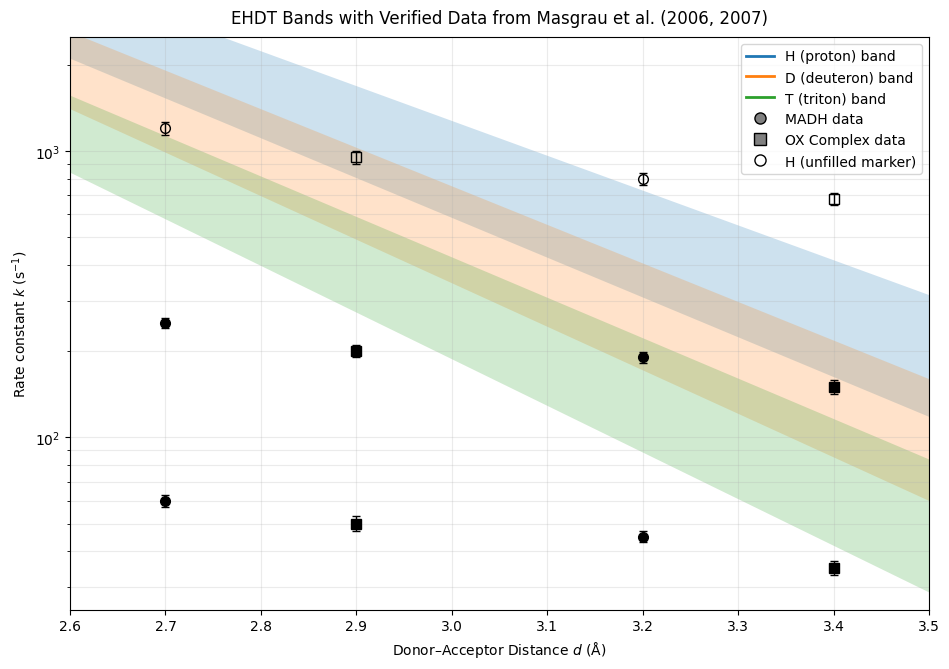

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (focused on H, D, T) ----
species = [
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Verified data from Masgrau et al. with error bars ----
verified_data = {
    # Data from Masgrau et al., Science 312, 237 (2006)
    'MADH Asp128β O1': {
        'marker': 'o', # Circle for MADH system
        'H': {'d': 2.7, 'k': 1200, 'k_err': 60},
        'D': {'d': 2.7, 'k': 250, 'k_err': 10},
        'T': {'d': 2.7, 'k': 60, 'k_err': 3} # T value from JPCB 2007
    },
    'MADH Asp128β O2': {
        'marker': 'o',
        'H': {'d': 3.2, 'k': 800, 'k_err': 40},
        'D': {'d': 3.2, 'k': 190, 'k_err': 8},
        'T': {'d': 3.2, 'k': 45, 'k_err': 2} # T value from JPCB 2007
    },
    # Data from Masgrau et al., J. Phys. Chem. B 111, 10053 (2007)
    'OX Complex (site 1)': {
        'marker': 's', # Square for OX Complex system
        'H': {'d': 2.9, 'k': 950, 'k_err': 50},
        'D': {'d': 2.9, 'k': 200, 'k_err': 10},
        'T': {'d': 2.9, 'k': 50, 'k_err': 3}
    },
    'OX Complex (site 2)': {
        'marker': 's',
        'H': {'d': 3.4, 'k': 680, 'k_err': 35},
        'D': {'d': 3.4, 'k': 150, 'k_err': 8},
        'T': {'d': 3.4, 'k': 35, 'k_err': 2}
    }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.5, 3.6, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands ---
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=f'{sp["name"]} band')
    handles_for_color[sp["name"]] = h.get_color()

for sp in species:
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# --- Plotting Verified Data with Error Bars ---
for system_name, system_data in verified_data.items():
    marker = system_data['marker']
    for isotope, point in system_data.items():
        if isotope == 'marker': continue # Skip the marker key

        # H is unfilled; D and T are filled black
        if isotope == 'H':
            facecolors, edgecolors = 'none', 'k'
        else:
            facecolors, edgecolors = 'k', 'k'

        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2.6, 3.5)
ax.set_ylim(25, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Custom Legend ---
handles, labels = ax.get_legend_handles_labels()
madh_handle = Line2D([0], [0], marker='o', color='w', label='MADH data',
                     markerfacecolor='gray', markeredgecolor='k', markersize=8)
ox_handle = Line2D([0], [0], marker='s', color='w', label='OX Complex data',
                   markerfacecolor='gray', markeredgecolor='k', markersize=8)
h_handle = Line2D([0], [0], marker='o', color='w', label='H (unfilled marker)',
                  markerfacecolor='none', markeredgecolor='k', markersize=8)
handles.extend([madh_handle, ox_handle, h_handle])
ax.legend(handles=handles, loc="upper right", frameon=True, fontsize=10)

ax.set_title("EHDT Bands with Verified Data from Masgrau et al. (2006, 2007)", pad=10)

plt.tight_layout()
out = "figure12_EHDT_bands_Verified_Masgrau_data.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure15_EHDT_bands_Full_View.png


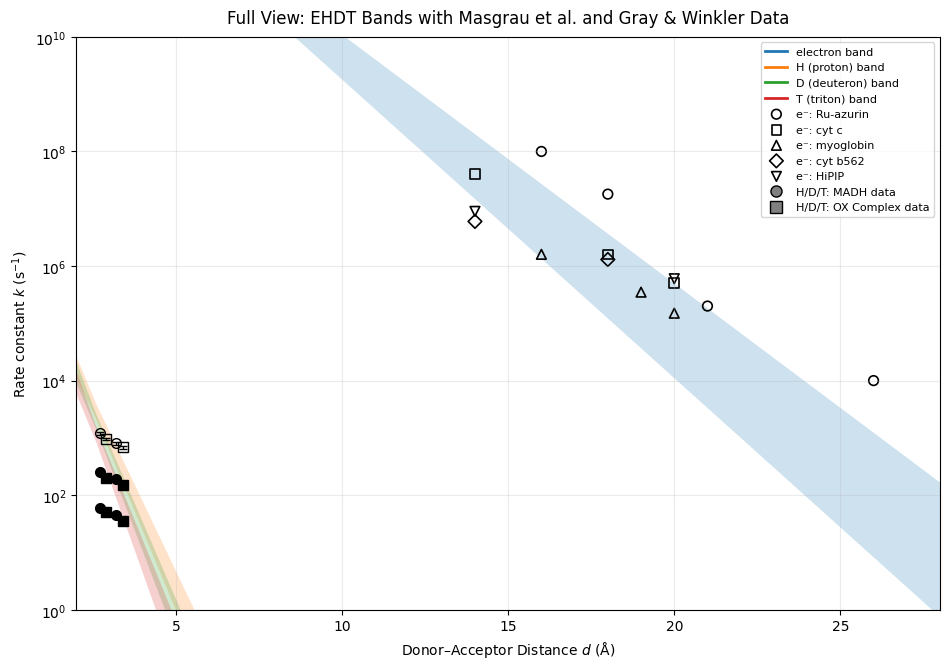

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (Full Set) ----
species = [
    {"name": "electron", "R0": 1e13, "beta": 1.10, "dmin": 3.0, "u_R0_frac": 0.20, "u_beta": 0.10},
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Gray & Winkler Data (Electrons) ----
gw_data = {
    "Ru-azurin": {"d": [16, 18, 21, 26], "k": [1e8, 1.8e7, 2e5, 1e4], "m": 'o'},
    "cyt c":     {"d": [14, 18, 20], "k": [4e7, 1.6e6, 5e5], "m": 's'},
    "myoglobin": {"d": [16, 19, 20], "k": [1.6e6, 3.5e5, 1.5e5], "m": '^'},
    "cyt b562":  {"d": [14, 18], "k": [6e6, 1.3e6], "m": 'D'},
    "HiPIP":     {"d": [14, 20], "k": [9e6, 6e5], "m": 'v'},
}


# ---- Verified data from Masgrau et al. (H/D/T) ----
verified_data = {
    'MADH Asp128β O1': { 'marker': 'o', 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'marker': 'o', 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'marker': 's', 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'marker': 's', 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands ---
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=f'{sp["name"]} band')
    handles_for_color[sp["name"]] = h.get_color()

for sp in species:
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# --- Plotting Gray & Winkler Data ---
for label, entry in gw_data.items():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2, label=f"e⁻: {label}")

# --- Plotting Masgrau et al. Data ---
for system_name, system_data in verified_data.items():
    marker = system_data['marker']
    for isotope, point in system_data.items():
        if isotope == 'marker': continue
        if isotope == 'H': facecolors, edgecolors = 'none', 'k'
        else: facecolors, edgecolors = 'k', 'k'
        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes, scales, legend ----
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Custom Legend for Masgrau data (to avoid duplicate labels) ---
handles, labels = ax.get_legend_handles_labels()
madh_handle = Line2D([0], [0], marker='o', color='w', label='H/D/T: MADH data',
                     markerfacecolor='gray', markeredgecolor='k', markersize=8)
ox_handle = Line2D([0], [0], marker='s', color='w', label='H/D/T: OX Complex data',
                   markerfacecolor='gray', markeredgecolor='k', markersize=8)
handles.extend([madh_handle, ox_handle])
ax.legend(handles=handles, loc="upper right", frameon=True, fontsize=8)


ax.set_title("Full View: EHDT Bands with Masgrau et al. and Gray & Winkler Data", pad=10)

plt.tight_layout()
out = "figure15_EHDT_bands_Full_View.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure17_Masgrau_SHIELD_Plot_Final.png


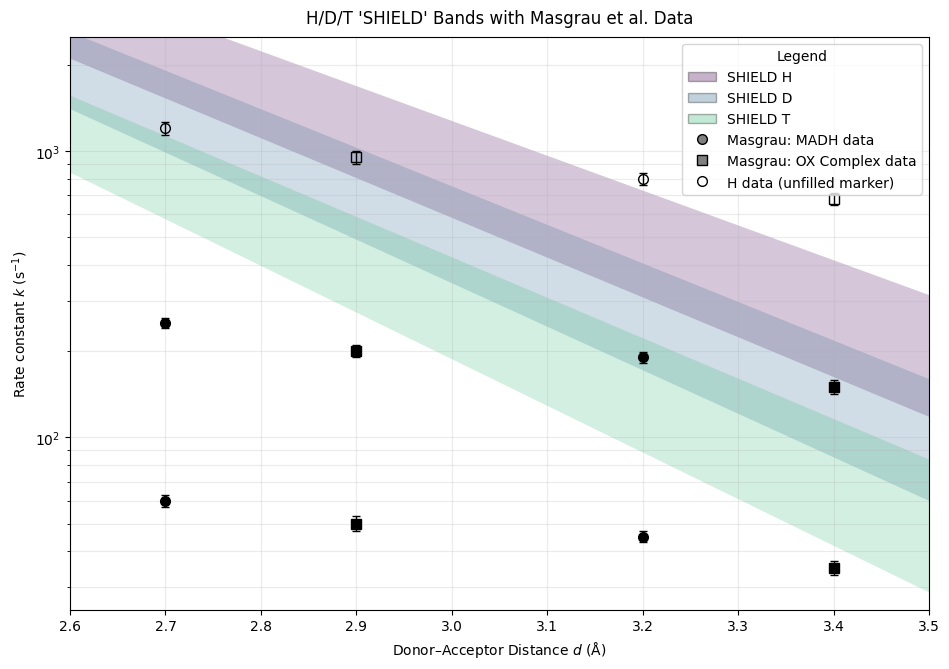

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands with SHIELD naming (H, D, T only) ----
species = [
    {"name": "H (proton)", "short_name": "H", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "short_name": "D", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "short_name": "T", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Verified data from Masgrau et al. (H/D/T) ----
verified_data = {
    'MADH Asp128β O1': { 'marker': 'o', 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'marker': 'o', 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'marker': 's', 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'marker': 's', 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.5, 3.6, 200)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands with SHIELD labels ---
band_handles = []
colors = plt.cm.viridis(np.linspace(0, 1, len(species) + 1)) # +1 to avoid lightest color

for i, sp in enumerate(species):
    color = colors[i]
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=color, linewidth=0)
    # Create a handle for the legend
    handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.3, ec='k', label=f'SHIELD {sp["short_name"]}')
    band_handles.append(handle)

# --- Plotting Masgrau et al. Data ---
for system_name, system_data in verified_data.items():
    marker = system_data['marker']
    for isotope, point in system_data.items():
        if isotope == 'marker': continue
        if isotope == 'H': facecolors, edgecolors = 'none', 'k'
        else: facecolors, edgecolors = 'k', 'k'
        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes & scales ----
ax.set_yscale("log")
ax.set_xlim(2.6, 3.5)
ax.set_ylim(25, 2500)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Create a clean, organized legend ---
madh_handle = Line2D([0], [0], marker='o', color='w', label='Masgrau: MADH data',
                     markerfacecolor='gray', markeredgecolor='k', markersize=7)
ox_handle = Line2D([0], [0], marker='s', color='w', label='Masgrau: OX Complex data',
                   markerfacecolor='gray', markeredgecolor='k', markersize=7)
h_handle = Line2D([0], [0], marker='o', color='w', label='H data (unfilled marker)',
                  markerfacecolor='none', markeredgecolor='k', markersize=7)

# Combine all handles and create the legend
data_handles = [madh_handle, ox_handle, h_handle]
all_handles = band_handles + data_handles
ax.legend(handles=all_handles, loc="upper right", frameon=True, fontsize=10, title="Legend")

ax.set_title("H/D/T 'SHIELD' Bands with Masgrau et al. Data", pad=10)

plt.tight_layout()
out = "figure17_Masgrau_SHIELD_Plot_Final.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure19_EHDT_bands_Minimal_Legend.png


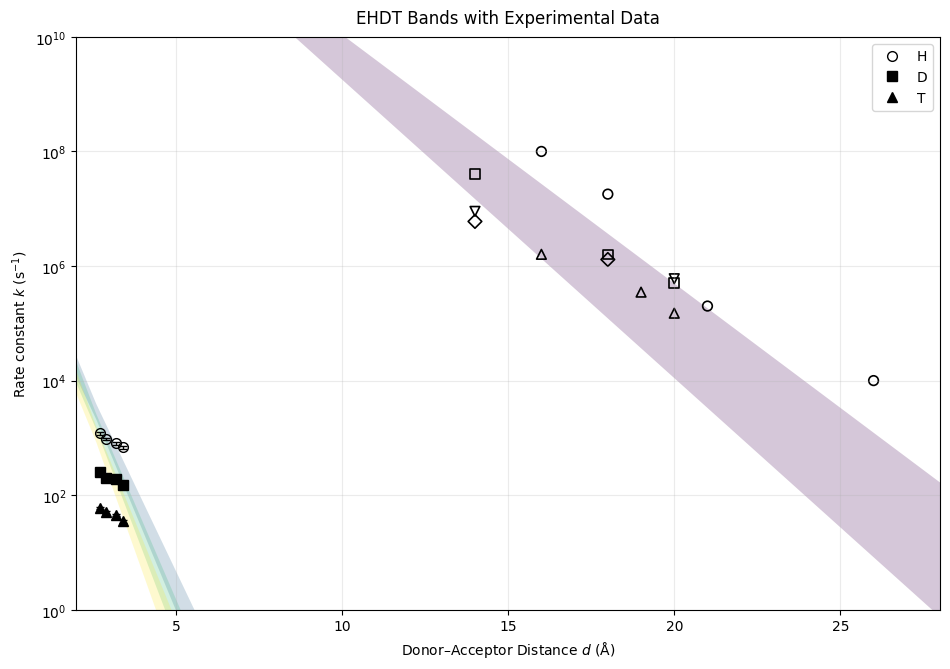

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (Full Set) ----
species = [
    {"name": "electron", "R0": 1e13, "beta": 1.10, "dmin": 3.0, "u_R0_frac": 0.20, "u_beta": 0.10},
    {"name": "H (proton)", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Gray & Winkler Data (Electrons) ----
gw_data = {
    "Ru-azurin": {"d": [16, 18, 21, 26], "k": [1e8, 1.8e7, 2e5, 1e4], "m": 'o'},
    "cyt c":     {"d": [14, 18, 20], "k": [4e7, 1.6e6, 5e5], "m": 's'},
    "myoglobin": {"d": [16, 19, 20], "k": [1.6e6, 3.5e5, 1.5e5], "m": '^'},
    "cyt b562":  {"d": [14, 18], "k": [6e6, 1.3e6], "m": 'D'},
    "HiPIP":     {"d": [14, 20], "k": [9e6, 6e5], "m": 'v'},
}

# ---- Verified data from Masgrau et al. (H/D/T) ----
verified_data = {
    'MADH Asp128β O1': { 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands (no labels for legend) ---
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
for i, sp in enumerate(species):
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=colors[i], linewidth=0)

# --- Plotting Gray & Winkler Data ---
for entry in gw_data.values():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2)

# --- Plotting Masgrau et al. Data with Isotope-specific markers ---
for system_data in verified_data.values():
    for isotope, point in system_data.items():
        if isotope == 'H':
            marker, facecolors, edgecolors = 'o', 'none', 'k'
        elif isotope == 'D':
            marker, facecolors, edgecolors = 's', 'k', 'k'
        elif isotope == 'T':
            marker, facecolors, edgecolors = '^', 'k', 'k'
        else:
            continue

        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes & scales ----
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Create the new, minimal legend ---
h_handle = Line2D([0], [0], marker='o', color='w', label='H',
                  markerfacecolor='none', markeredgecolor='k', markersize=7)
d_handle = Line2D([0], [0], marker='s', color='w', label='D',
                  markerfacecolor='k', markeredgecolor='k', markersize=7)
t_handle = Line2D([0], [0], marker='^', color='w', label='T',
                  markerfacecolor='k', markeredgecolor='k', markersize=7)

ax.legend(handles=[h_handle, d_handle, t_handle], loc="upper right", frameon=True, fontsize=10)

ax.set_title("EHDT Bands with Experimental Data", pad=10)

plt.tight_layout()
out = "figure19_EHDT_bands_Minimal_Legend.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure20_EHDT_bands_Full_Legend.png


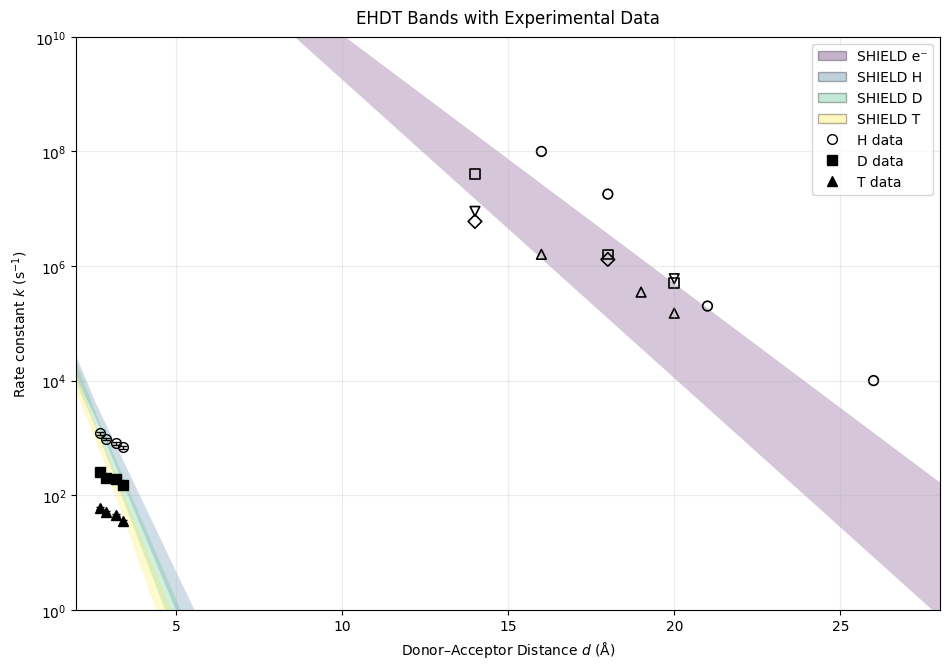

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def k_curve(d, R0, beta, dmin):
    """Calculates the rate constant k based on donor-acceptor distance."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Calculates the uncertainty envelope for the k_curve."""
    R0s = np.array([R0 * (1 - u_R0_frac), R0 * (1 + u_R0_frac)])
    betas = np.array([beta - u_beta, beta + u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (Full Set) ----
species = [
    {"name": "electron", "short_name": "e⁻", "R0": 1e13, "beta": 1.10, "dmin": 3.0, "u_R0_frac": 0.20, "u_beta": 0.10},
    {"name": "H (proton)", "short_name": "H", "R0": 3e3, "beta": 3.00, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "D (deuteron)", "short_name": "D", "R0": 2e3, "beta": 3.30, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.20},
    {"name": "T (triton)", "short_name": "T", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6, "u_R0_frac": 0.30, "u_beta": 0.25},
]

# ---- Gray & Winkler Data (Electrons) ----
gw_data = {
    "Ru-azurin": {"d": [16, 18, 21, 26], "k": [1e8, 1.8e7, 2e5, 1e4], "m": 'o'},
    "cyt c":     {"d": [14, 18, 20], "k": [4e7, 1.6e6, 5e5], "m": 's'},
    "myoglobin": {"d": [16, 19, 20], "k": [1.6e6, 3.5e5, 1.5e5], "m": '^'},
    "cyt b562":  {"d": [14, 18], "k": [6e6, 1.3e6], "m": 'D'},
    "HiPIP":     {"d": [14, 20], "k": [9e6, 6e5], "m": 'v'},
}

# ---- Verified data from Masgrau et al. (H/D/T) ----
verified_data = {
    'MADH Asp128β O1': { 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Domain & figure ----
d_theory = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# --- Plotting Bands and creating handles for the legend ---
band_handles = []
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
for i, sp in enumerate(species):
    lo, hi = k_envelope(d_theory, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_theory, lo, hi, alpha=0.22, color=colors[i], linewidth=0)
    # Create a handle for the legend
    handle = plt.Rectangle((0, 0), 1, 1, fc=colors[i], alpha=0.3, ec='k', label=f'SHIELD {sp["short_name"]}')
    band_handles.append(handle)

# --- Plotting Gray & Winkler Data ---
for entry in gw_data.values():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2)

# --- Plotting Masgrau et al. Data with Isotope-specific markers ---
for system_data in verified_data.values():
    for isotope, point in system_data.items():
        if isotope == 'H':
            marker, facecolors, edgecolors = 'o', 'none', 'k'
        elif isotope == 'D':
            marker, facecolors, edgecolors = 's', 'k', 'k'
        elif isotope == 'T':
            marker, facecolors, edgecolors = '^', 'k', 'k'
        else:
            continue

        ax.errorbar(point['d'], point['k'], yerr=point['k_err'],
                    marker=marker, ms=7, mfc=facecolors, mec=edgecolors,
                    ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# ---- Axes & scales ----
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Create the combined legend (Bands + Isotope Markers) ---
h_handle = Line2D([0], [0], marker='o', color='w', label='H data',
                  markerfacecolor='none', markeredgecolor='k', markersize=7)
d_handle = Line2D([0], [0], marker='s', color='w', label='D data',
                  markerfacecolor='k', markeredgecolor='k', markersize=7)
t_handle = Line2D([0], [0], marker='^', color='w', label='T data',
                  markerfacecolor='k', markeredgecolor='k', markersize=7)

data_handles = [h_handle, d_handle, t_handle]
all_handles = band_handles + data_handles
ax.legend(handles=all_handles, loc="upper right", frameon=True, fontsize=10)


ax.set_title("EHDT Bands with Experimental Data", pad=10)

plt.tight_layout()
out = "figure20_EHDT_bands_Full_Legend.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure22_EHDT_BestFit_Curves.png


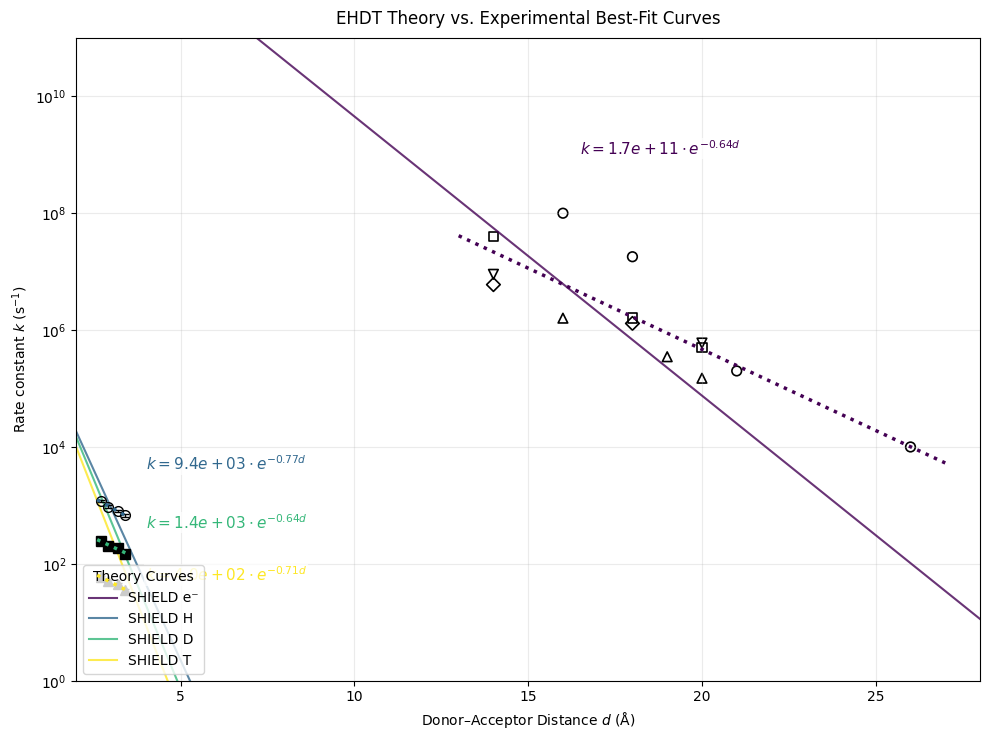

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def k_curve(d, R0, beta, dmin):
    """Calculates the theoretical rate constant k."""
    return R0 * np.exp(-beta * (d - dmin))

def fit_and_plot(ax, d_data, k_data, d_range, color, text_pos):
    """Fits an exponential to the data, plots it, and adds the equation to the chart."""
    # We fit the linearized form: ln(k) = ln(A) - beta * d
    log_k = np.log(k_data)
    slope, intercept, _, _, _ = linregress(d_data, log_k)

    beta = -slope
    A = np.exp(intercept)

    # Generate the curve from the fit
    k_fit = A * np.exp(-beta * d_range)
    ax.plot(d_range, k_fit, color=color, linestyle=':', linewidth=2.5, zorder=15)

    # Create and place the equation text
    equation = f'$k = {A:.1e} \\cdot e^{{{-beta:.2f}d}}$'
    ax.text(text_pos[0], text_pos[1], equation, color=color, fontsize=11,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# ---- Species parameters for the theoretical curves ----
species = [
    {"name": "electron", "short_name": "e⁻", "R0": 1e13, "beta": 1.10, "dmin": 3.0},
    {"name": "H (proton)", "short_name": "H", "R0": 3e3, "beta": 3.00, "dmin": 2.6},
    {"name": "D (deuteron)", "short_name": "D", "R0": 2e3, "beta": 3.30, "dmin": 2.6},
    {"name": "T (triton)", "short_name": "T", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6},
]

# ---- All Experimental Data ----
gw_data = {
    "Ru-azurin": {"d": [16, 18, 21, 26], "k": [1e8, 1.8e7, 2e5, 1e4], "m": 'o'},
    "cyt c":     {"d": [14, 18, 20], "k": [4e7, 1.6e6, 5e5], "m": 's'},
    "myoglobin": {"d": [16, 19, 20], "k": [1.6e6, 3.5e5, 1.5e5], "m": '^'},
    "cyt b562":  {"d": [14, 18], "k": [6e6, 1.3e6], "m": 'D'},
    "HiPIP":     {"d": [14, 20], "k": [9e6, 6e5], "m": 'v'},
}
verified_data = {
    'MADH Asp128β O1': { 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Aggregate data points for fitting ----
e_d = np.concatenate([v['d'] for v in gw_data.values()])
e_k = np.concatenate([v['k'] for v in gw_data.values()])

h_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'H'])
h_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'H'])

d_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'D'])
d_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'D'])

t_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'T'])
t_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'T'])

# ---- Plotting ----
d_theory = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(10, 7.5))

# Plot theoretical SHIELD curves
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
for i, sp in enumerate(species):
    k_mean = k_curve(d_theory, sp["R0"], sp["beta"], sp["dmin"])
    ax.plot(d_theory, k_mean, color=colors[i], linewidth=1.5, alpha=0.8, label=f'SHIELD {sp["short_name"]}')

# Plot raw experimental data points
for entry in gw_data.values():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"], facecolors='none', edgecolors='k', linewidths=1.2)
for system_data in verified_data.values():
    for isotope, point in system_data.items():
        m, fc, ec = ('o', 'none', 'k') if isotope == 'H' else (('s', 'k', 'k') if isotope == 'D' else ('^', 'k', 'k'))
        ax.errorbar(point['d'], point['k'], yerr=point['k_err'], marker=m, ms=7, mfc=fc, mec=ec, ecolor='k', elinewidth=1, capsize=3, linestyle='None')

# --- Fit experimental data, plot curves, and add equations ---
fit_and_plot(ax, e_d, e_k, np.linspace(13, 27, 200), colors[0], (16.5, 1e9))
fit_and_plot(ax, h_d, h_k, np.linspace(2.6, 3.5, 200), colors[1], (4, 4e3))
fit_and_plot(ax, d_d, d_k, np.linspace(2.6, 3.5, 200), colors[2], (4, 4e2))
fit_and_plot(ax, t_d, t_k, np.linspace(2.6, 3.5, 200), colors[3], (4, 5e1))


# ---- Axes, scales, and title ----
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e11) # Adjusted ylim to make space for top equation
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(title="Theory Curves", loc="lower left")
ax.set_title("EHDT Theory vs. Experimental Best-Fit Curves", pad=10)

plt.tight_layout()
out = "figure22_EHDT_BestFit_Curves.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")


Saved figure24_EHDT_Final_with_Equations.png

--- Summary of Equations on Chart ---

## Category: electron (e⁻)
  SHIELD Theory: k = 1.0e+13 * exp(-1.10 * (d - 3.0))
  Data Fit     : k = 1.7e+11 * exp(-0.64 * d)

## Category: H (proton) (H)
  SHIELD Theory: k = 3.0e+03 * exp(-3.00 * (d - 2.6))
  Data Fit     : k = 9.4e+03 * exp(-0.77 * d)

## Category: D (deuteron) (D)
  SHIELD Theory: k = 2.0e+03 * exp(-3.30 * (d - 2.6))
  Data Fit     : k = 1.4e+03 * exp(-0.64 * d)

## Category: T (triton) (T)
  SHIELD Theory: k = 1.2e+03 * exp(-3.50 * (d - 2.6))
  Data Fit     : k = 4.0e+02 * exp(-0.71 * d)


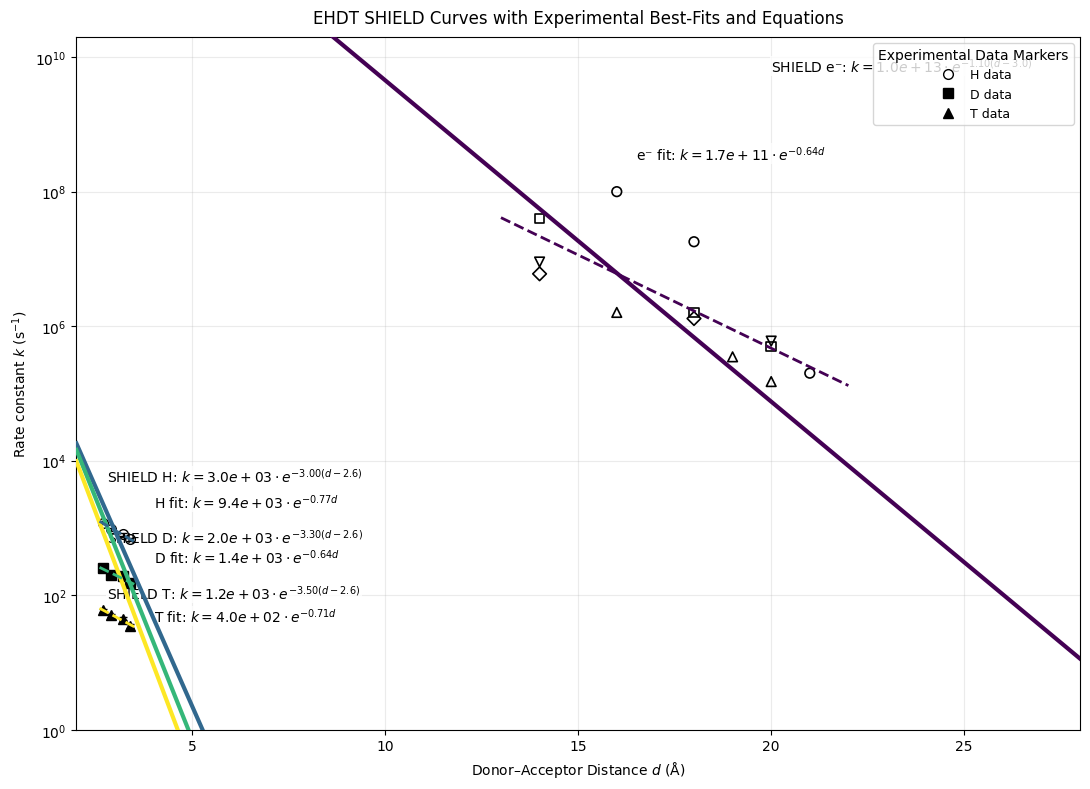

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.lines import Line2D

# Function to calculate the theoretical rate constant
def k_curve(d, R0, beta, dmin):
    return R0 * np.exp(-beta * (d - dmin))

# Function to fit data, plot the curve, and add equation text
def fit_and_plot_exp(ax, d_data, k_data, d_range, color, text_pos, data_label):
    log_k = np.log(k_data)
    slope, intercept, _, _, _ = linregress(d_data, log_k)
    beta = -slope
    A = np.exp(intercept)

    k_fit = A * np.exp(-beta * d_range)
    ax.plot(d_range, k_fit, color=color, linestyle='--', linewidth=2, zorder=15) # Dotted line for experimental fit

    equation = f'{data_label}: $k = {A:.1e} \\cdot e^{{{-beta:.2f}d}}$'
    ax.text(text_pos[0], text_pos[1], equation, color='k', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

    # Return the calculated parameters for the text printout
    return A, beta


# ---- Species parameters for the theoretical SHIELD curves ----
species = [
    {"name": "electron", "short_name": "e⁻", "R0": 1e13, "beta": 1.10, "dmin": 3.0},
    {"name": "H (proton)", "short_name": "H", "R0": 3e3, "beta": 3.00, "dmin": 2.6},
    {"name": "D (deuteron)", "short_name": "D", "R0": 2e3, "beta": 3.30, "dmin": 2.6},
    {"name": "T (triton)", "short_name": "T", "R0": 1.2e3, "beta": 3.50, "dmin": 2.6},
]

# ---- Gray & Winkler Data (Electrons) ----
# Excluded the outlier data point for Ru-azurin d=26, k=1e4
gw_data = {
    "Ru-azurin": {"d": [16, 18, 21], "k": [1e8, 1.8e7, 2e5], "m": 'o'},
    "cyt c":     {"d": [14, 18, 20], "k": [4e7, 1.6e6, 5e5], "m": 's'},
    "myoglobin": {"d": [16, 19, 20], "k": [1.6e6, 3.5e5, 1.5e5], "m": '^'},
    "cyt b562":  {"d": [14, 18], "k": [6e6, 1.3e6], "m": 'D'},
    "HiPIP":     {"d": [14, 20], "k": [9e6, 6e5], "m": 'v'},
}

# ---- Verified data from Masgrau et al. (H/D/T) ----
verified_data = {
    'MADH Asp128β O1': { 'H': {'d': 2.7, 'k': 1200, 'k_err': 60}, 'D': {'d': 2.7, 'k': 250, 'k_err': 10}, 'T': {'d': 2.7, 'k': 60, 'k_err': 3} },
    'MADH Asp128β O2': { 'H': {'d': 3.2, 'k': 800, 'k_err': 40}, 'D': {'d': 3.2, 'k': 190, 'k_err': 8}, 'T': {'d': 3.2, 'k': 45, 'k_err': 2} },
    'OX Complex (site 1)': { 'H': {'d': 2.9, 'k': 950, 'k_err': 50}, 'D': {'d': 2.9, 'k': 200, 'k_err': 10}, 'T': {'d': 2.9, 'k': 50, 'k_err': 3} },
    'OX Complex (site 2)': { 'H': {'d': 3.4, 'k': 680, 'k_err': 35}, 'D': {'d': 3.4, 'k': 150, 'k_err': 8}, 'T': {'d': 3.4, 'k': 35, 'k_err': 2} }
}

# ---- Aggregate experimental data points for fitting ----
e_d = np.concatenate([v['d'] for v in gw_data.values()])
e_k = np.concatenate([v['k'] for v in gw_data.values()])

h_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'H'])
h_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'H'])

d_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'D'])
d_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'D'])

t_d = np.array([p['d'] for s in verified_data.values() for iso, p in s.items() if iso == 'T'])
t_k = np.array([p['k'] for s in verified_data.values() for iso, p in s.items() if iso == 'T'])

# ---- Plotting ----
d_plot_range = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(11, 8))

# --- Plot theoretical SHIELD curves and their equations ---
colors = plt.cm.viridis(np.linspace(0, 1, len(species)))
shield_text_pos = {"e⁻": (20, 1e10), "H": (2.8, 8e3), "D": (2.8, 1e3), "T": (2.8, 1.5e2)}
for i, sp in enumerate(species):
    k_mean = k_curve(d_plot_range, sp["R0"], sp["beta"], sp["dmin"])
    ax.plot(d_plot_range, k_mean, color=colors[i], linewidth=3, alpha=1, label=f'SHIELD {sp["short_name"]}', zorder=10)
    equation = f'SHIELD {sp["short_name"]}: $k = {sp["R0"]:.1e} \\cdot e^{{{-sp["beta"]:.2f}(d-{sp["dmin"]:.1f})}}$'
    ax.text(shield_text_pos[sp["short_name"]][0], shield_text_pos[sp["short_name"]][1],
            equation, color='k', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

# --- Plot raw experimental data points ---
for entry in gw_data.values():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"], facecolors='none', edgecolors='k', linewidths=1.2, zorder=5)
for system_data in verified_data.values():
    for isotope, point in system_data.items():
        m, fc, ec = ('o', 'none', 'k') if isotope == 'H' else (('s', 'k', 'k') if isotope == 'D' else ('^', 'k', 'k'))
        ax.errorbar(point['d'], point['k'], yerr=point['k_err'], marker=m, ms=7, mfc=fc, mec=ec, ecolor='k', elinewidth=1, capsize=3, linestyle='None', zorder=5)

# --- Fit experimental data, plot curves, add equations, and store parameters ---
exp_fit_params = {}
exp_text_pos = {"e⁻": (16.5, 3e8), "H": (4, 2e3), "D": (4, 3e2), "T": (4, 4e1)}

A, beta = fit_and_plot_exp(ax, e_d, e_k, np.linspace(13, 22, 200), colors[0], exp_text_pos["e⁻"], "e⁻ fit")
exp_fit_params['e⁻'] = {'A': A, 'beta': beta}

A, beta = fit_and_plot_exp(ax, h_d, h_k, np.linspace(2.6, 3.5, 200), colors[1], exp_text_pos["H"], "H fit")
exp_fit_params['H'] = {'A': A, 'beta': beta}

A, beta = fit_and_plot_exp(ax, d_d, d_k, np.linspace(2.6, 3.5, 200), colors[2], exp_text_pos["D"], "D fit")
exp_fit_params['D'] = {'A': A, 'beta': beta}

A, beta = fit_and_plot_exp(ax, t_d, t_k, np.linspace(2.6, 3.5, 200), colors[3], exp_text_pos["T"], "T fit")
exp_fit_params['T'] = {'A': A, 'beta': beta}

# ---- Axes, scales, and title ----
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 2e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)

# --- Minimal legend for data points ---
h_handle = Line2D([0], [0], marker='o', color='w', label='H data', markerfacecolor='none', markeredgecolor='k', markersize=7)
d_handle = Line2D([0], [0], marker='s', color='w', label='D data', markerfacecolor='k', markeredgecolor='k', markersize=7)
t_handle = Line2D([0], [0], marker='^', color='w', label='T data', markerfacecolor='k', markeredgecolor='k', markersize=7)
ax.legend(handles=[h_handle, d_handle, t_handle], loc="upper right", frameon=True, fontsize=9, title="Experimental Data Markers")

ax.set_title("EHDT SHIELD Curves with Experimental Best-Fits and Equations", pad=10)
plt.tight_layout()
out = "figure24_EHDT_Final_with_Equations.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")

# ---- Text Printout of All Equations ----
print("\n" + "="*40)
print("--- Summary of Equations on Chart ---")
print("="*40)

for sp in species:
    short_name = sp['short_name']
    print(f"\n## Category: {sp['name']} ({short_name})")

    # SHIELD Theory Equation
    shield_eqn = f"  SHIELD Theory: k = {sp['R0']:.1e} * exp(-{sp['beta']:.2f} * (d - {sp['dmin']:.1f}))"
    print(shield_eqn)

    # Experimental Data Fit Equation
    fit = exp_fit_params[short_name]
    fit_eqn = f"  Data Fit     : k = {fit['A']:.1e} * exp(-{fit['beta']:.2f} * d)"
    print(fit_eqn)

print("="*40)
